/tmp/ipython-input-2881332800.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driver Ratings'].fillna(df['Driver Ratings'].mean(), inplace=True)
/tmp/ipython-input-2881332800.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

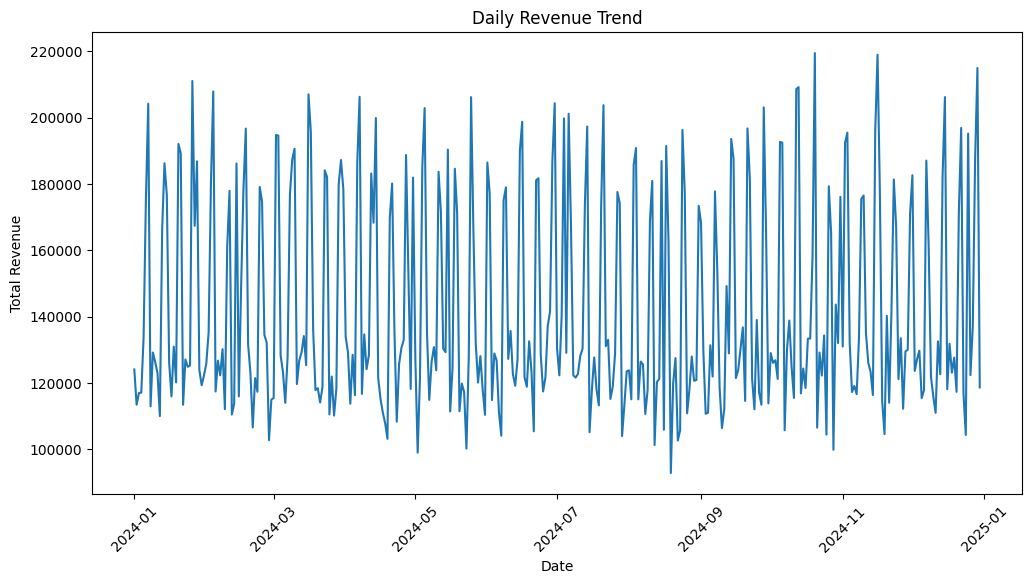

/tmp/ipython-input-2881332800.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_pickups, x='Count', y='Pickup Location', palette="viridis")


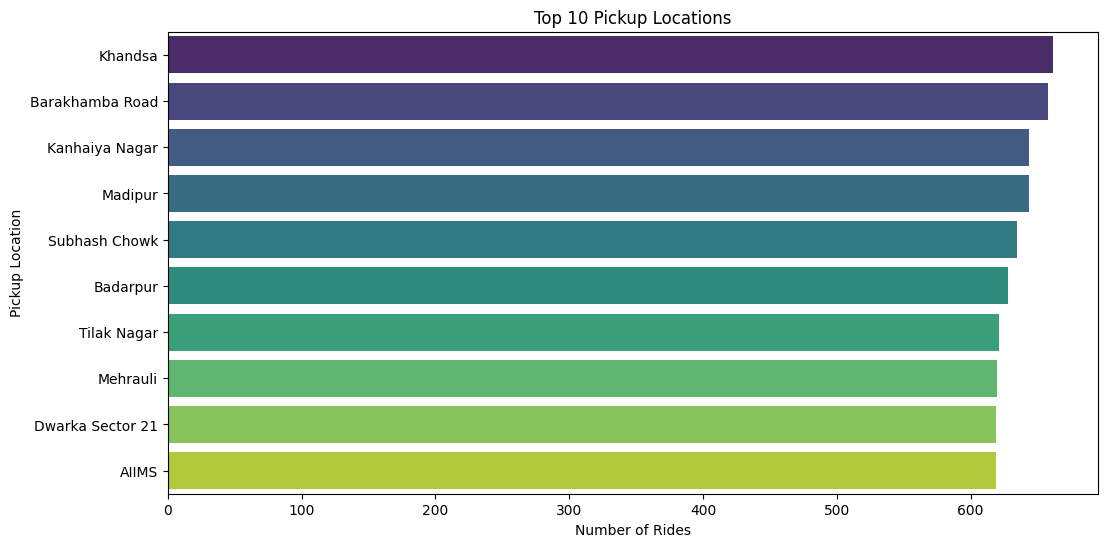

/tmp/ipython-input-2881332800.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Booking Status', order=df['Booking Status'].value_counts().index, palette="Set2")


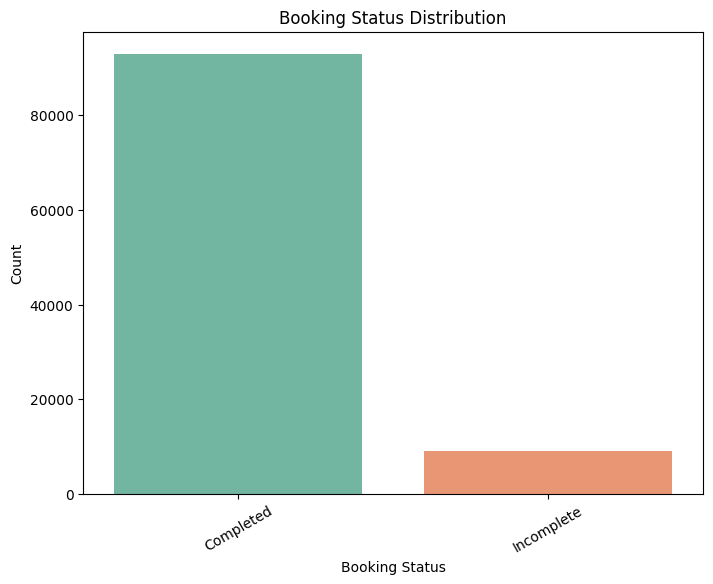

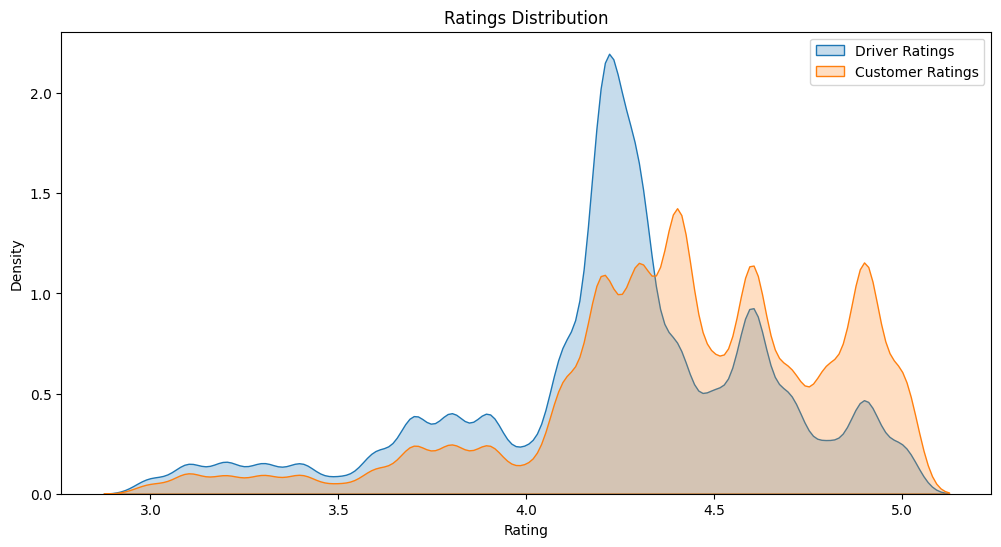

In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 2: Load the dataset
# Replace "YOUR_FILE_PATH_HERE" with the actual path to your ncr_ride_bookings.csv file
df = pd.read_csv("/content/ncr_ride_bookings.csv")

# Step 3: Handle missing values
df.dropna(subset=['Booking Value', 'Ride Distance'], inplace=True)
df['Driver Ratings'].fillna(df['Driver Ratings'].mean(), inplace=True)
df['Customer Rating'].fillna(df['Customer Rating'].mean(), inplace=True)

# Step 4: Convert Date column
df['Date'] = pd.to_datetime(df['Date'])

# Step 5: Create Revenue column
df['Revenue'] = df['Booking Value']

# Step 6: Filter dataset (example: Auto rides only)
df_auto = df.loc[df['Vehicle Type'] == 'Auto'].copy()

# -------------------------
# 📊 VISUALIZATIONS
# -------------------------

# 1. Daily Revenue Trend
daily_revenue = df.groupby('Date')['Revenue'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_revenue, x='Date', y='Revenue')
plt.title("Daily Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

# 2. Top 10 Pickup Locations
top_pickups = df['Pickup Location'].value_counts().nlargest(10).reset_index()
top_pickups.columns = ['Pickup Location', 'Count']
plt.figure(figsize=(12,6))
sns.barplot(data=top_pickups, x='Count', y='Pickup Location', palette="viridis")
plt.title("Top 10 Pickup Locations")
plt.xlabel("Number of Rides")
plt.ylabel("Pickup Location")
plt.show()

# 3. Booking Status Distribution
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Booking Status', order=df['Booking Status'].value_counts().index, palette="Set2")
plt.title("Booking Status Distribution")
plt.xlabel("Booking Status")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

# 4. Ratings Distribution (Driver vs Customer)
plt.figure(figsize=(12,6))
sns.kdeplot(df['Driver Ratings'], label="Driver Ratings", fill=True)
sns.kdeplot(df['Customer Rating'], label="Customer Ratings", fill=True)
plt.title("Ratings Distribution")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.legend()
plt.show()

# 5. Interactive Revenue by Vehicle Type (Plotly)
fig = px.bar(
    df.groupby('Vehicle Type')['Revenue'].sum().reset_index(),
    x='Vehicle Type', y='Revenue', color='Vehicle Type',
    title="Revenue by Vehicle Type", text='Revenue'
)
fig.show()

In [ ]:
df.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Revenue
count,20986,20986.000000,20986.000000,0.0,0.0,1868.0,20986.000000,20986.000000,20986.000000,20986.000000,20986.000000
mean,2024-06-30 23:23:05.037644032,8.283313,29.106490,NaN,NaN,1.0,506.116792,24.783026,4.231091,4.407328,506.116792
min,2024-01-01 00:00:00,2.000000,10.000000,NaN,NaN,1.0,50.000000,1.000000,3.000000,3.000000,50.000000
25%,2024-04-02 00:00:00,5.100000,21.600000,NaN,NaN,1.0,234.000000,12.642500,4.100000,4.200000,234.000000
50%,2024-06-30 00:00:00,8.200000,28.700000,NaN,NaN,1.0,412.000000,23.885000,4.231091,4.407328,412.000000
75%,2024-09-30 00:00:00,11.400000,36.700000,NaN,NaN,1.0,689.000000,37.000000,4.500000,4.700000,689.000000
max,2024-12-30 00:00:00,15.000000,45.000000,NaN,NaN,1.0,4277.000000,50.000000,5.000000,5.000000,4277.000000
std,NaN,3.717761,8.888325,NaN,NaN,0.0,390.551952,14.027120,0.417486,0.417101,390.551952
